In [61]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sb

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [62]:
df =pd.read_csv('df.csv', sep='\t',low_memory=False)
#df = pd.read_csv(os.path.join('..', 'school_data', 'df.csv'))
df.shape

(10903, 105)

In [63]:
df.count()

Unnamed: 0               10903
ClosedDate                  47
CDSCode                  10903
StatusType               10903
County                   10903
District                 10903
School                    9826
Zip                      10903
Latitude                 10903
Longitude                10903
FundingType               1154
Virtual                   9826
ClosedYear                  47
five_zip                 10903
sname                     9826
cds                      10903
type                     10903
charter                   1120
met_all                  10903
crit1                    10903
crit2                    10903
e_enr                    10765
e_tst                    10765
e_prof                   10765
m_enr                    10765
m_tst                    10765
m_prof                   10765
ee_aa                    10765
et_aa                    10765
enp_aa                   10903
                         ...  
total_grads                115
uc_grads

In [64]:
df.CDSCode=df.CDSCode.astype(str)

df['school_code']=df['CDSCode'].str[-7:]
df.CDSCode=df.CDSCode.astype(int)


In [65]:
 #df.drop(df.school_code=='0000000', inplace = True)

In [66]:
df=df[df.school_code!='0000000']
df.head()

,Unnamed: 0,ClosedDate,CDSCode,StatusType,County,District,School,Zip,Latitude,Longitude,...,Pop,cds.3,perc_male,perc_wh,perc_as,perc_his,perc_aa,total_enrollment,year.5,school_code
1,1,NaN,1100170112607,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,94612-3355,37.804520,-122.26815,...,14389.0,1.100170e+12,0.427848,0.027848,0.020253,0.468354,0.412658,395.0,2015.0,0112607
2,2,NaN,1100170123968,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,94606-4903,37.784648,-122.23863,...,36672.0,1.100170e+12,0.471204,0.125654,0.078534,0.450262,0.251309,191.0,2015.0,0123968
3,3,NaN,1100170124172,Active,Alameda,Alameda County Office of Education,Yu Ming Charter,94608-1265,37.847375,-122.28356,...,28019.0,1.100170e+12,0.509728,0.089494,0.439689,0.046693,0.038911,257.0,2015.0,0124172
4,4,NaN,1100170125567,Active,Alameda,Alameda County Office of Education,Urban Montessori Charter,94619-3312,37.778352,-122.18950,...,23299.0,1.100170e+12,0.566308,0.336918,0.075269,0.250896,0.193548,279.0,2015.0,0125567
5,5,NaN,1100170130401,Active,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,94578-1005,37.712878,-122.11173,...,38558.0,1.100170e+12,0.922156,0.053892,0.023952,0.347305,0.491018,167.0,2015.0,0130401


In [67]:
df.Virtual.value_counts()


N    8897
P     884
F      45
Name: Virtual, dtype: int64

This field identifies the type of virtual instruction offered by the school. Virtual instruction is instruction in which students and teachers are separated by time and/or location, and interaction occurs via computers and/or telecommunications technologies. The field is coded as follows:

F = Full Virtual – The school offers only virtual instruction

P = Partial Virtual – The school offers some, but not all, instruction through virtual instruction

N = Not Virtual – The school does not offer any virtual instruction.

Blank = The type of virtual instruction offered by the school is not known, or the record is for a district or county office. Data are only available at the school level, however not all schools in this file are required to provide this information.

In [68]:
df['partial_virtual']=df.Virtual=='P'
df['all_virtual']=df.Virtual=='F'
df['any_virtual']=df.partial_virtual|df.all_virtual
df.any_virtual.value_counts()

False    8897
True      929
Name: any_virtual, dtype: int64

In [69]:
df.drop(['Zip.1','County_Code','School_Code','CDS','year.5','Virtual'],axis=1,inplace=True)
df.drop(['District_Code','year','SchoolCode'],axis=1,inplace=True)
df.drop(['total_years','SchAttend'],axis=1,inplace=True)
df.drop(['grad15','year.4','cds.2','MetAttendTarg'],axis=1,inplace=True)
df.drop(['ClosedDate','StatusType','ClosedYear','Zip','sname','cds'],axis=1,inplace=True)
df.drop(['cds.1','year.1','year.2','Cds_Code','year.3','total_grads','uc_grads','male_grads','male_uc_grads','minority_grads','minority_uc_grads','Unnamed: 0'],axis=1,inplace=True)

In [70]:
df.count()

CDSCode                  9826
County                   9826
District                 9826
School                   9826
Latitude                 9826
Longitude                9826
FundingType              1154
five_zip                 9826
type                     9826
charter                  1120
met_all                  9826
crit1                    9826
crit2                    9826
e_enr                    9688
e_tst                    9688
e_prof                   9688
m_enr                    9688
m_tst                    9688
m_prof                   9688
ee_aa                    9688
et_aa                    9688
enp_aa                   9826
me_aa                    9688
mt_aa                    9688
mnp_aa                   9826
ee_wh                    9688
et_wh                    9688
enp_wh                   9826
me_wh                    9688
mt_wh                    9688
                         ... 
mppm_aa                  9688
eppm_wh                  9688
mppm_wh   

In [71]:
#ethnicity feature engineering 
#ee_wh/e_enr
#ee_aa/e_enr
#ee_hi/e_hi
#ee_as_e_enr
#df['perc_staff_masters']=df['num_staff_masters']*1.0/df['num_staff']

In [72]:
df.corr()

,CDSCode,Latitude,Longitude,five_zip,crit1,crit2,e_enr,e_tst,m_enr,m_tst,...,cds.3,perc_male,perc_wh,perc_as,perc_his,perc_aa,total_enrollment,partial_virtual,all_virtual,any_virtual
CDSCode,1.000000,0.026198,-0.027987,0.209465,0.026525,0.024521,0.000687,0.001849,0.000474,0.002213,...,1.000000,-0.005247,0.129933,-0.022588,-0.048056,-0.166145,-0.001728,0.017564,0.013643,0.020325
Latitude,0.026198,1.000000,-0.863827,0.876091,-0.195075,-0.219157,-0.223422,-0.222652,-0.224056,-0.222817,...,0.026321,0.095040,0.348012,0.048361,-0.374453,-0.039097,-0.220136,-0.007639,-0.015702,-0.011094
Longitude,-0.027987,-0.863827,1.000000,-0.753153,0.134666,0.149626,0.175522,0.175663,0.175754,0.175633,...,-0.028126,-0.059587,-0.238640,-0.129349,0.321043,0.013849,0.173599,0.031775,0.016700,0.034928
five_zip,0.209465,0.876091,-0.753153,1.000000,-0.129416,-0.150479,-0.168246,-0.166705,-0.168670,-0.166444,...,0.209655,0.078181,0.376122,0.073437,-0.380434,-0.105147,-0.165753,0.006403,-0.003069,0.005553
crit1,0.026525,-0.195075,0.134666,-0.129416,1.000000,0.916234,0.598686,0.624825,0.599242,0.626747,...,0.026786,-0.261665,-0.254787,0.203189,0.148703,-0.010453,0.385170,-0.147322,-0.099410,-0.167013
crit2,0.024521,-0.219157,0.149626,-0.150479,0.916234,1.000000,0.646101,0.647668,0.646599,0.647802,...,0.024808,-0.264524,-0.271984,0.203027,0.152991,0.025350,0.477103,-0.098927,-0.045408,-0.107223
e_enr,0.000687,-0.223422,0.175522,-0.168246,0.598686,0.646101,1.000000,0.996215,0.999929,0.995523,...,0.000810,-0.191878,-0.113027,0.171521,0.058493,-0.048276,0.651357,-0.031183,-0.024073,-0.036067
e_tst,0.001849,-0.222652,0.175663,-0.166705,0.624825,0.647668,0.996215,1.000000,0.996149,0.999444,...,0.001973,-0.194999,-0.117137,0.174045,0.063627,-0.054953,0.632386,-0.042377,-0.032822,-0.049039
m_enr,0.000474,-0.224056,0.175754,-0.168670,0.599242,0.646599,0.999929,0.996149,1.000000,0.995604,...,0.000596,-0.191858,-0.114502,0.173386,0.059172,-0.048537,0.650908,-0.031765,-0.024253,-0.036677
m_tst,0.002213,-0.222817,0.175633,-0.166444,0.626747,0.647802,0.995523,0.999444,0.995604,1.000000,...,0.002338,-0.195274,-0.118684,0.176458,0.064385,-0.055510,0.629699,-0.043933,-0.033171,-0.050641


In [73]:
#create features by making percents out of totals

# teacher training
df['perc_staff_masters']=df['num_staff_masters']*1.0/df['num_staff']

#teachers per student
df['student_teacher']=df['Cumulative_Enrollment']*1.0/df['num_staff']

df=df.rename(columns = {'Median':'median_income'})



In [74]:
#df=df[['CDSCode','m_pprof','e_pprof','perc_crit','met_all','perc_staff_masters','Truancy_Rate','perc_eligible_free','perc_eligible_FRPM','median_income','student_teacher']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d485510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12bccfe50>]], dtype=object)

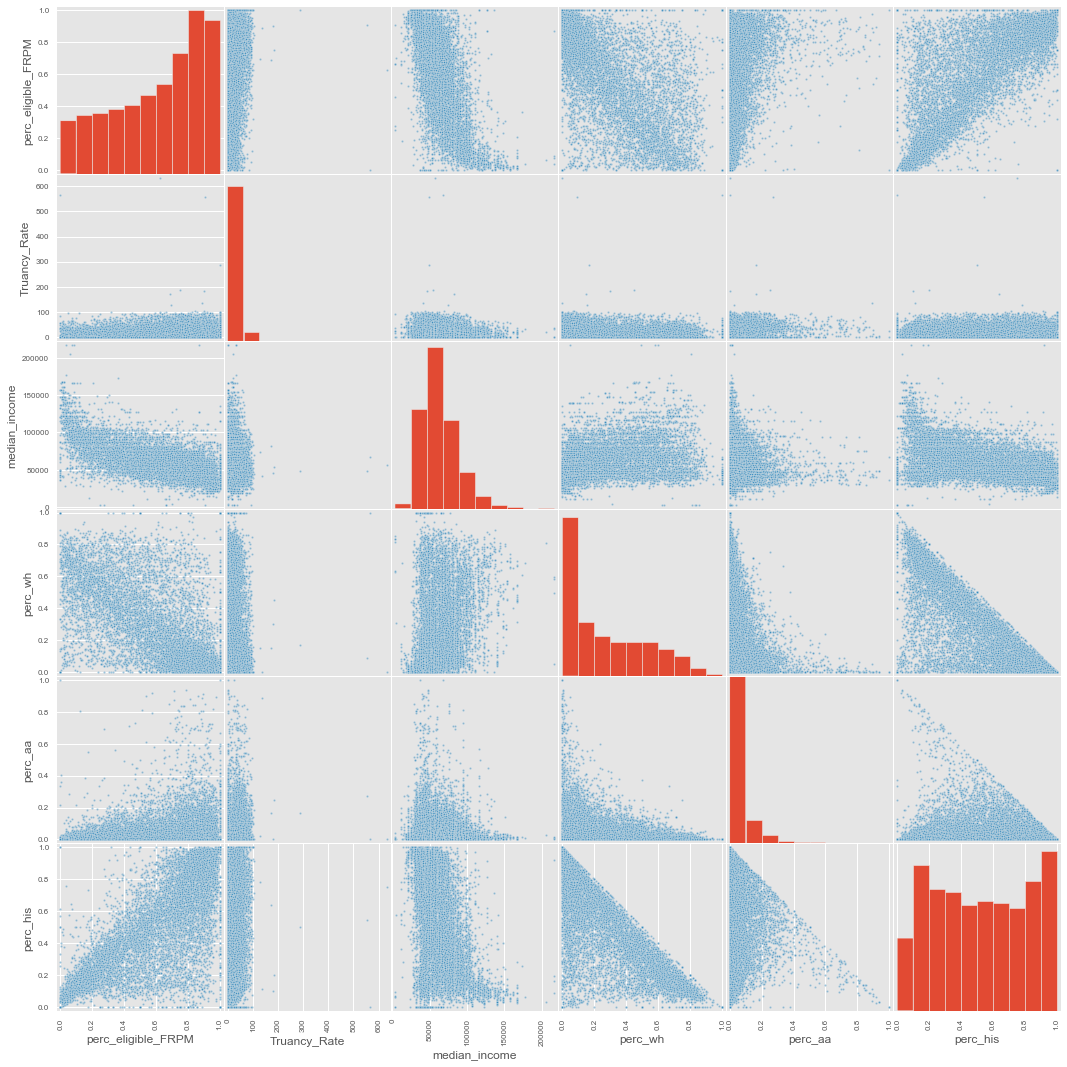

In [75]:
cols = ['perc_eligible_FRPM','Truancy_Rate','median_income','perc_wh','perc_aa','perc_his','m_pprof','e_pprof']

pd.scatter_matrix(df[cols], figsize=(18, 18))

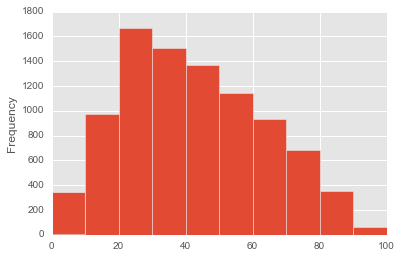

In [76]:
df.met_all.value_counts()
df=df.dropna(subset=['m_pprof'])
df=df[df.m_pprof!='--']
df.m_pprof=df.m_pprof.astype(float)
df=df[df.e_pprof!='--']
df.e_pprof=df.e_pprof.astype(float)

#Percent English Proficient
df.e_pprof.plot(kind='hist')

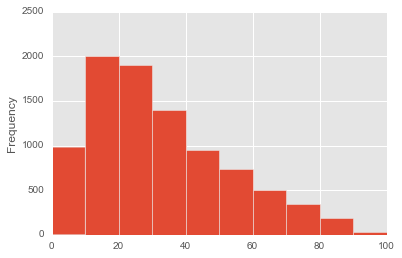

In [77]:
# PERCENT MATH PROFICIENT
df.m_pprof.plot(kind='hist')


In [78]:
df[['CDSCode','m_pprof','e_pprof','perc_crit','met_all','perc_staff_masters','Truancy_Rate','perc_eligible_free','perc_eligible_FRPM','median_income','student_teacher']].corr()

,CDSCode,m_pprof,e_pprof,perc_crit,perc_staff_masters,Truancy_Rate,perc_eligible_free,perc_eligible_FRPM,median_income,student_teacher
CDSCode,1.000000,0.034157,0.042160,0.008166,0.133133,-0.039721,-0.090042,-0.075058,0.083023,-0.009872
m_pprof,0.034157,1.000000,0.870044,0.192854,0.095218,-0.331304,-0.760082,-0.759654,0.614851,-0.087289
e_pprof,0.042160,0.870044,1.000000,0.101884,0.120866,-0.272893,-0.783285,-0.769607,0.581192,-0.067357
perc_crit,0.008166,0.192854,0.101884,1.000000,-0.021854,-0.041808,0.009824,0.024427,0.005419,-0.064686
perc_staff_masters,0.133133,0.095218,0.120866,-0.021854,1.000000,-0.040633,-0.110477,-0.091877,0.116581,0.074095
Truancy_Rate,-0.039721,-0.331304,-0.272893,-0.041808,-0.040633,1.000000,0.284653,0.278540,-0.187140,-0.016328
perc_eligible_free,-0.090042,-0.760082,-0.783285,0.009824,-0.110477,0.284653,1.000000,0.983029,-0.692817,0.087577
perc_eligible_FRPM,-0.075058,-0.759654,-0.769607,0.024427,-0.091877,0.278540,0.983029,1.000000,-0.702237,0.088378
median_income,0.083023,0.614851,0.581192,0.005419,0.116581,-0.187140,-0.692817,-0.702237,1.000000,-0.078450
student_teacher,-0.009872,-0.087289,-0.067357,-0.064686,0.074095,-0.016328,0.087577,0.088378,-0.078450,1.000000


Enrollment Size

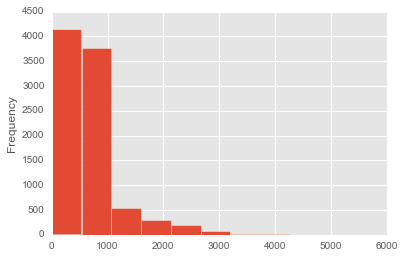

In [79]:
df.total_enrollment.plot(kind='hist')

In [80]:
#look at  outliers
df[df.Cumulative_Enrollment>4000].head(10)

,CDSCode,County,District,School,Latitude,Longitude,FundingType,five_zip,type,charter,...,perc_as,perc_his,perc_aa,total_enrollment,school_code,partial_virtual,all_virtual,any_virtual,perc_staff_masters,student_teacher
192,1612420134668,Alameda,New Haven Unified,James Logan High,37.592494,-122.02604,NaN,94587,H,NaN,...,0.215235,0.339724,0.080777,3912.0,0134668,False,False,False,NaN,NaN
1264,10739651030626,Fresno,Central Unified,Central High East Campus,36.787386,-119.88038,NaN,93722,H,NaN,...,0.141106,0.533654,0.096875,4160.0,1030626,False,False,False,0.101382,20.525346
2144,19642461996537,Los Angeles,Antelope Valley Union High,Desert Sands Charter,34.684768,-118.16417,Directly funded,93534,H,D,...,0.015075,0.581407,0.183417,1990.0,1996537,False,True,True,0.314815,78.759259
2179,19642870114397,Los Angeles,Baldwin Park Unified,Opportunities For Learning - Baldwin Park II,34.152079,-118.07903,Directly funded,91107,H,D,...,0.005774,0.695920,0.157429,2598.0,0114397,False,False,False,NaN,NaN
2183,19642871996479,Los Angeles,Baldwin Park Unified,Opportunities for Learning - Baldwin Park,34.152079,-118.07903,Directly funded,91107,H,D,...,0.015954,0.650471,0.079768,1379.0,1996479,False,False,False,0.186813,43.950549
2337,19644511932441,Los Angeles,Downey Unified,Downey High,33.939009,-118.12902,NaN,90241,H,NaN,...,0.022459,0.863830,0.034279,4230.0,1932441,False,False,False,0.212435,23.347150
2631,19647251936947,Los Angeles,Long Beach Unified,Polytechnic High,33.787163,-118.18496,NaN,90813,H,NaN,...,0.178091,0.366039,0.232079,4464.0,1936947,False,False,False,0.538071,23.492386
2633,19647251939875,Los Angeles,Long Beach Unified,Wilson High,33.778903,-118.14152,NaN,90804,H,NaN,...,0.078347,0.529158,0.117647,3944.0,1939875,False,False,False,0.545977,23.649425
3105,19647331933746,Los Angeles,Los Angeles Unified,Granada Hills Charter High,34.261787,-118.52343,Directly funded,91344,H,D,...,0.172109,0.389116,0.039002,4410.0,1933746,True,False,True,0.173913,21.975845
3812,19648570112714,Los Angeles,Palmdale Elementary,Antelope Valley Learning Academy,34.580380,-118.10184,Directly funded,93550,H,D,...,0.005168,0.627046,0.146425,1161.0,0112714,True,False,True,NaN,NaN


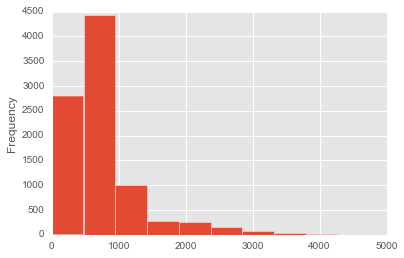

In [81]:
#look at unreasonable outliers
df[df.Cumulative_Enrollment<5000].Cumulative_Enrollment.plot(kind='hist')

In [82]:
df.type.value_counts()

E    5845
H    1852
M    1349
Name: type, dtype: int64

In [83]:
df.met_all.value_counts()

Yes    8127
No      919
Name: met_all, dtype: int64

In [84]:
def yestrue(x):
    if x=='Yes':
        return True
    if x=='No':
        return False

In [85]:
#df['met_all']=df[df.met_all=='Yes']
df['success']=df.met_all.apply(yestrue)

In [86]:
df.success.value_counts()

True     8127
False     919
Name: success, dtype: int64

In [87]:
math_avg=df.m_pprof.mean()
english_avg=df.e_pprof.mean()
print math_avg
print english_avg

32.1000110546
42.3007185496


In [88]:
df['math_above_avg']=df.m_pprof>math_avg
df['english_above_avg']=df.e_pprof>english_avg
df['above_avg']=df.math_above_avg & df.english_above_avg

In [89]:
df.head()

,CDSCode,County,District,School,Latitude,Longitude,FundingType,five_zip,type,charter,...,school_code,partial_virtual,all_virtual,any_virtual,perc_staff_masters,student_teacher,success,math_above_avg,english_above_avg,above_avg
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,37.804520,-122.26815,Directly funded,94612,H,D,...,0112607,False,False,False,NaN,NaN,True,False,False,False
2,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,37.784648,-122.23863,Directly funded,94606,E,D,...,0123968,False,False,False,NaN,NaN,False,False,False,False
3,1100170124172,Alameda,Alameda County Office of Education,Yu Ming Charter,37.847375,-122.28356,Directly funded,94608,E,D,...,0124172,False,False,False,NaN,NaN,True,True,True,True
4,1100170125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,37.778352,-122.18950,Directly funded,94619,E,D,...,0125567,False,False,False,NaN,NaN,True,False,True,False
6,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,37.658212,-122.09713,NaN,94544,H,NaN,...,0130419,False,False,False,NaN,NaN,False,False,False,False


In [90]:
df[['perc_crit','perc_staff_masters','student_teacher','avg_years_teaching','total_enrollment','Truancy_Rate','median_income','any_virtual','perc_wh','perc_aa','perc_his','perc_as','success','m_pprof','e_pprof','above_avg']].corr()

,perc_crit,perc_staff_masters,student_teacher,avg_years_teaching,total_enrollment,Truancy_Rate,median_income,any_virtual,perc_wh,perc_aa,perc_his,perc_as,success,m_pprof,e_pprof,above_avg
perc_crit,1.000000,-0.021854,-0.064686,-0.007352,-0.037133,-0.041808,0.005419,-0.217705,-0.037988,-0.079244,0.032573,0.063847,0.833589,0.192854,0.101884,0.093220
perc_staff_masters,-0.021854,1.000000,0.074095,0.017142,0.086860,-0.040633,0.116581,0.026644,0.023478,-0.004387,-0.039557,0.017766,-0.012122,0.095218,0.120866,0.114332
student_teacher,-0.064686,0.074095,1.000000,0.087244,0.222172,-0.016328,-0.078450,-0.003684,-0.180491,0.122050,0.137787,0.019002,-0.040453,-0.087289,-0.067357,-0.054318
avg_years_teaching,-0.007352,0.017142,0.087244,1.000000,-0.008044,-0.039101,0.015279,-0.024388,0.047719,-0.007187,-0.022253,-0.005849,0.006476,0.074889,0.050900,0.077724
total_enrollment,-0.037133,0.086860,0.222172,-0.008044,1.000000,0.140413,0.118302,0.141765,-0.090474,-0.017421,0.032582,0.131480,-0.107142,0.094479,0.261500,0.095785
Truancy_Rate,-0.041808,-0.040633,-0.016328,-0.039101,0.140413,1.000000,-0.187140,0.015845,-0.206751,0.222772,0.185726,-0.166131,-0.072606,-0.331304,-0.272893,-0.293169
median_income,0.005419,0.116581,-0.078450,0.015279,0.118302,-0.187140,1.000000,-0.000422,0.373752,-0.126197,-0.510462,0.387403,-0.010648,0.614851,0.581192,0.531140
any_virtual,-0.217705,0.026644,-0.003684,-0.024388,0.141765,0.015845,-0.000422,1.000000,0.048665,0.038659,-0.027473,-0.044022,-0.201870,-0.099722,0.035089,-0.047479
perc_wh,-0.037988,0.023478,-0.180491,0.047719,-0.090474,-0.206751,0.373752,0.048665,1.000000,-0.256917,-0.779062,-0.060077,-0.040525,0.470592,0.496420,0.468135
perc_aa,-0.079244,-0.004387,0.122050,-0.007187,-0.017421,0.222772,-0.126197,0.038659,-0.256917,1.000000,-0.102412,-0.068966,-0.088699,-0.231049,-0.224190,-0.176757


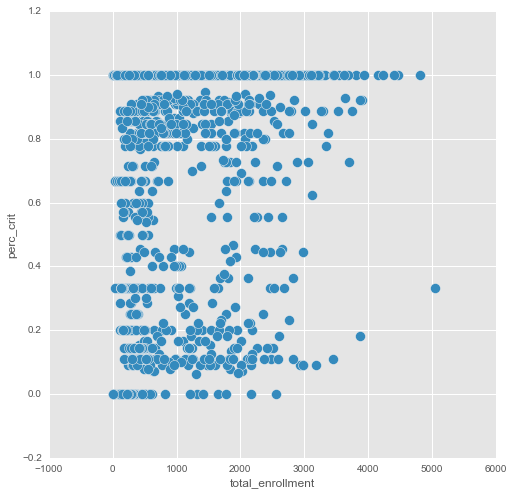

In [91]:
df[df.Cumulative_Enrollment<6000].plot(kind='scatter',x='total_enrollment', y='perc_crit', s=100,figsize=(8,8))

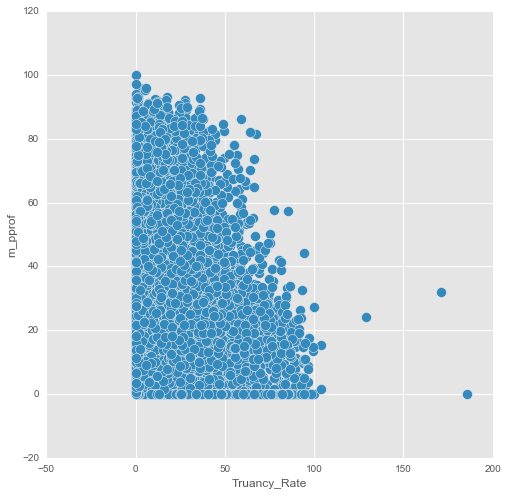

In [92]:
df[df.Cumulative_Enrollment<6000].plot(kind='scatter',x='Truancy_Rate', y='m_pprof', s=100,figsize=(8,8))

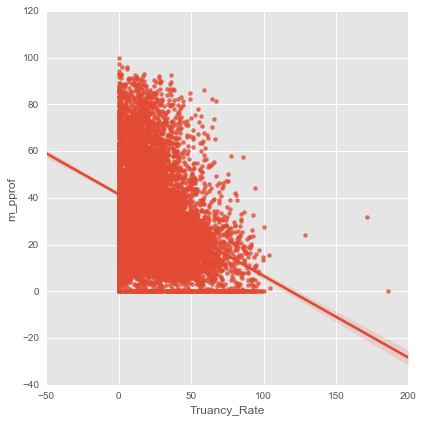

In [93]:
sb.lmplot('Truancy_Rate','m_pprof',df,size=6)

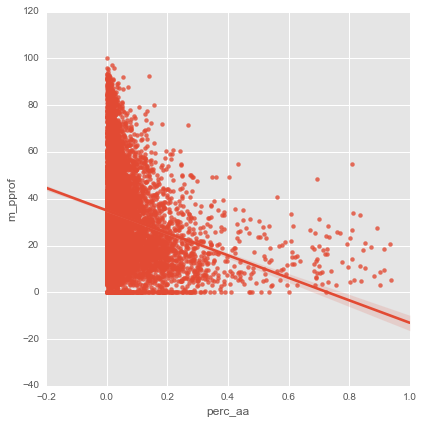

In [94]:
#african american vs. math proficiency
sb.lmplot('perc_aa','m_pprof',df,size=6)

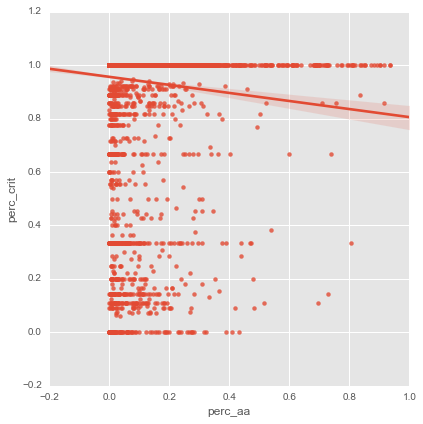

In [95]:
#african american vs. %school criteria met
sb.lmplot('perc_aa','perc_crit',df,size=6)

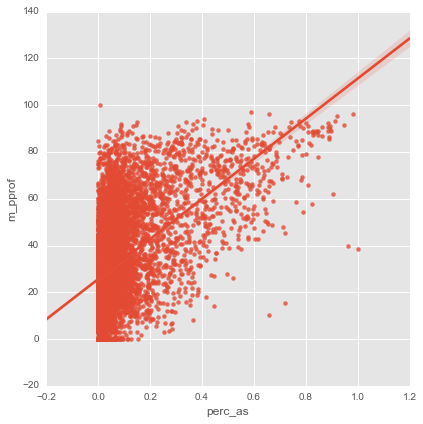

In [96]:
#asian vs. math proficiency 
sb.lmplot('perc_as','m_pprof',df,size=6)

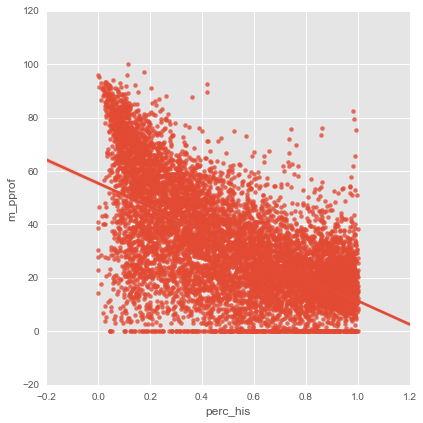

In [97]:
#hispanic vs. math proficiency 
sb.lmplot('perc_his','m_pprof',df,size=6)

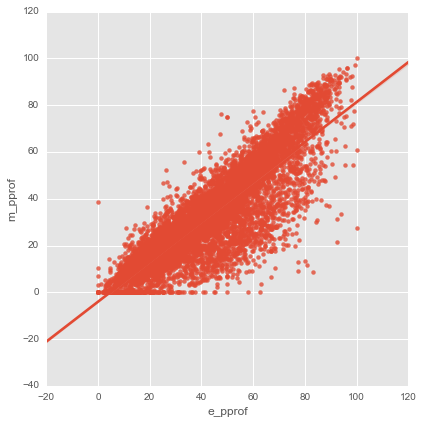

In [98]:
#english vs. math proficiency 
sb.lmplot('e_pprof','m_pprof',df,size=6)

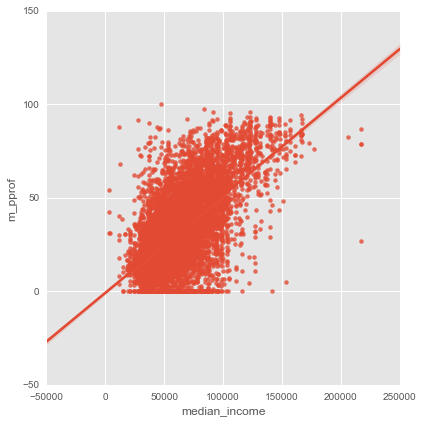

In [99]:
#income vs. math proficiency 
sb.lmplot('median_income','m_pprof',df,size=6)

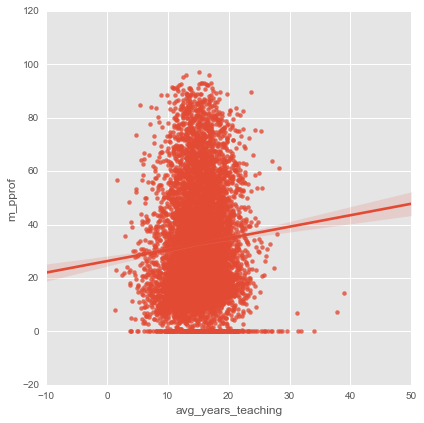

In [100]:
sb.lmplot('avg_years_teaching','m_pprof',df,size=6)

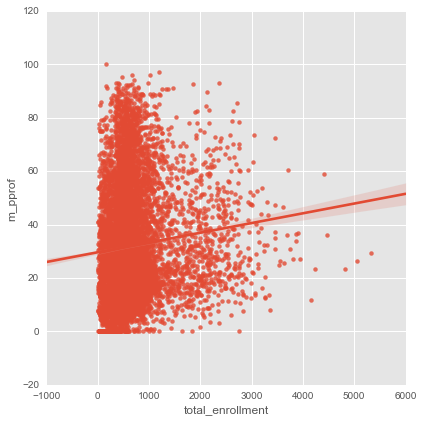

In [101]:
#school size vs. math proficiency 
sb.lmplot('total_enrollment','m_pprof',df,size=6)

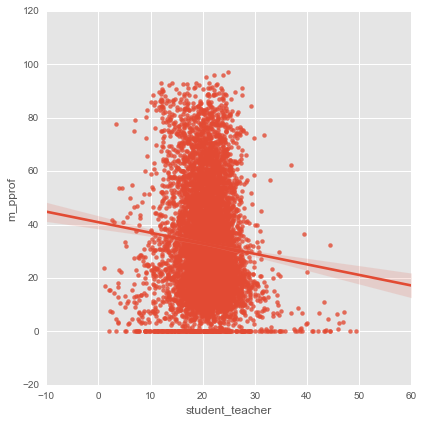

In [102]:
#student to teacher ratio vs. math proficiency 
sb.lmplot('student_teacher','m_pprof',df[df.student_teacher<50],size=6)

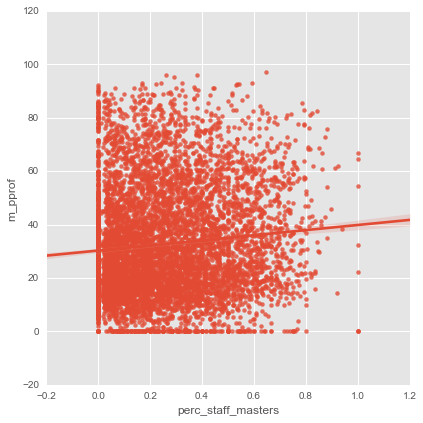

In [103]:
# perc teachers with masters vs. math proficiency 
sb.lmplot('perc_staff_masters','m_pprof',df,size=6)

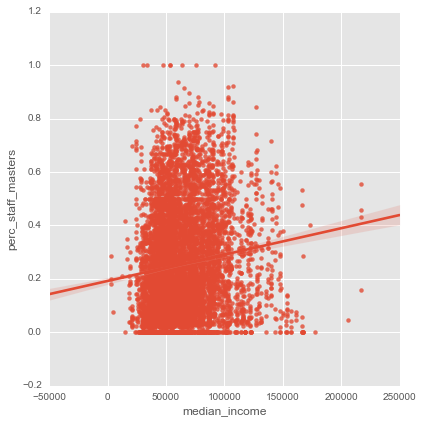

In [104]:
# income vs. perc teachers with masters
sb.lmplot('median_income','perc_staff_masters',df,size=6)

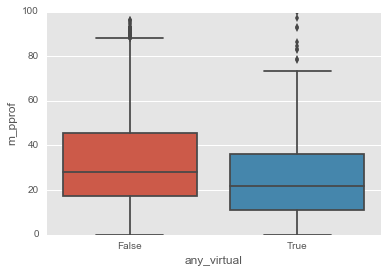

In [105]:
ax = sb.boxplot(x="any_virtual", y="m_pprof", data=df)

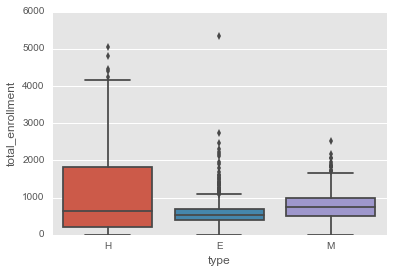

In [106]:
ax = sb.boxplot(x="type", y="total_enrollment", data=df)

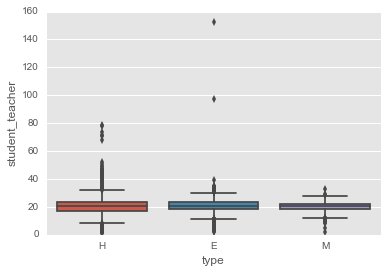

In [107]:
ax = sb.boxplot(x="type", y="student_teacher", data=df)

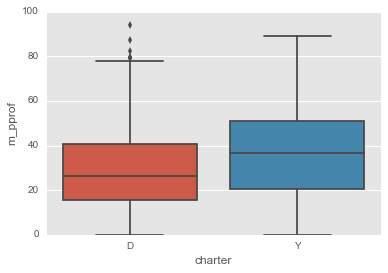

In [108]:
ax = sb.boxplot(x="charter", y="m_pprof", data=df)

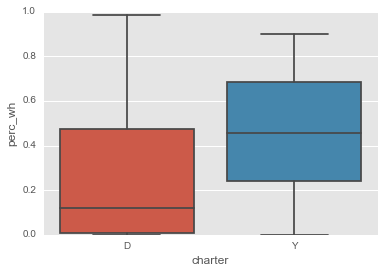

In [109]:
ax = sb.boxplot(x="charter", y="perc_wh", data=df)

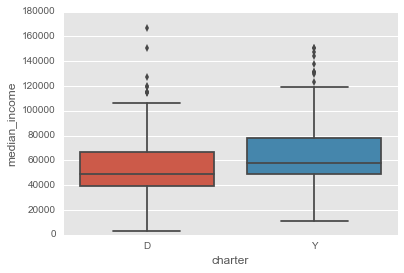

In [110]:
ax = sb.boxplot(x="charter", y="median_income", data=df)

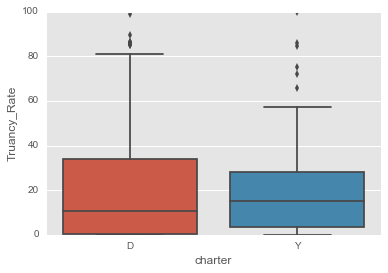

In [111]:
ax = sb.boxplot(x="charter", y="Truancy_Rate", data=df)

In [112]:
df.charter.value_counts()

D    766
Y    296
Name: charter, dtype: int64

In [113]:
df.to_csv('school_data.csv', sep='\t', encoding='utf-8')

In [114]:
df.head(2)
#df.m_pprof.value_counts()

,CDSCode,County,District,School,Latitude,Longitude,FundingType,five_zip,type,charter,...,school_code,partial_virtual,all_virtual,any_virtual,perc_staff_masters,student_teacher,success,math_above_avg,english_above_avg,above_avg
1,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,37.804520,-122.26815,Directly funded,94612,H,D,...,0112607,False,False,False,NaN,NaN,True,False,False,False
2,1100170123968,Alameda,Alameda County Office of Education,Community School for Creative Education,37.784648,-122.23863,Directly funded,94606,E,D,...,0123968,False,False,False,NaN,NaN,False,False,False,False


In [115]:

color = df.math_above_avg.map(pd.Series({True: 'green', False: 'red'}))

(0, 120.0)

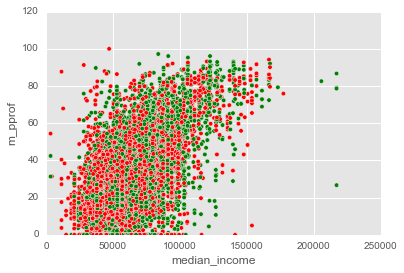

In [116]:
axes = df.plot('median_income','m_pprof', kind = 'scatter',c=color)
#axes.set_title('total enrollment as a function of zip code income', fontsize = 16)

#axes.set_xlabel('')
axes.set_xlim(0)

#axes.set_ylabel('')
axes.set_ylim(0)

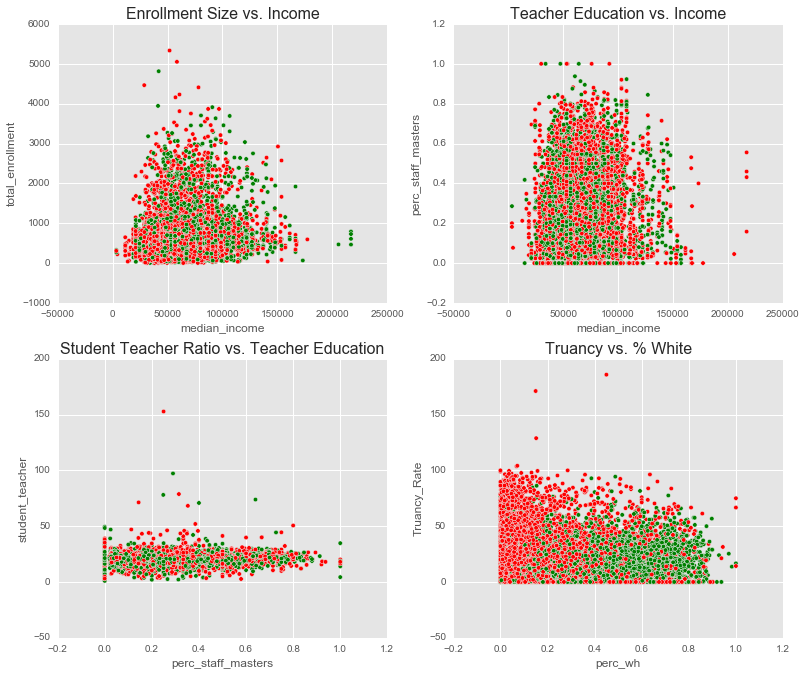

In [117]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 11))

df.plot('median_income','total_enrollment', kind = 'scatter',c=color, ax = axes[0, 0])
axes[0, 0].set_title('Enrollment Size vs. Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df.plot('median_income','perc_staff_masters', kind = 'scatter',c=color, ax = axes[0, 1])
axes[0, 1].set_title('Teacher Education vs. Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df.plot('perc_wh','Truancy_Rate', kind = 'scatter',c=color, ax = axes[1, 1])
axes[1,1].set_title('Truancy vs. % White', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df.plot('perc_staff_masters','student_teacher', kind = 'scatter',c=color, ax = axes[1, 0])
axes[1,0].set_title('Student Teacher Ratio vs. Teacher Education', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)



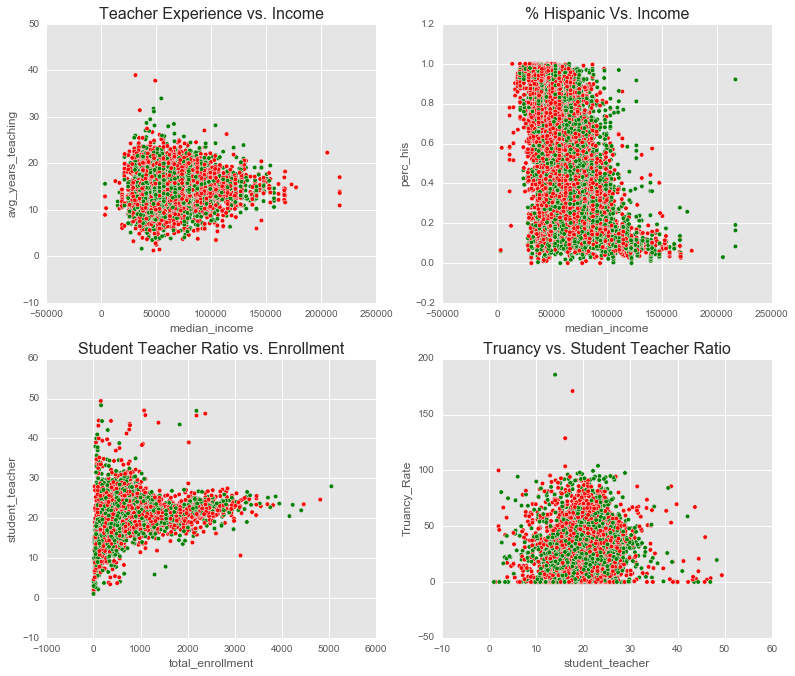

In [118]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 11))

df.plot('median_income','avg_years_teaching', kind = 'scatter',c=color, ax = axes[0, 0])
axes[0, 0].set_title('Teacher Experience vs. Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df.plot('median_income','perc_his', kind = 'scatter',c=color, ax = axes[0, 1])
axes[0, 1].set_title('% Hispanic Vs. Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df[df.student_teacher<50].plot('student_teacher','Truancy_Rate', kind = 'scatter',c=color, ax = axes[1, 1])
axes[1,1].set_title('Truancy vs. Student Teacher Ratio', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df[df.student_teacher<50].plot('total_enrollment','student_teacher', kind = 'scatter',c=color, ax = axes[1, 0])
axes[1, 0].set_title('Student Teacher Ratio vs. Enrollment', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


In [119]:
#what if "succes" instead of math and english above average, math and english above 50% proficient?

df['math_50pp']=df.m_pprof>50
df['english_50pp']=df.m_pprof>50
df['above_50pp']=df.math_50pp & df.english_50pp
print df.above_50pp.value_counts()

print df.m_pprof.mean()
print df.e_pprof.mean()

print df.met_all.value_counts()

False    7253
True     1793
Name: above_50pp, dtype: int64
32.1000110546
42.3007185496
Yes    8127
No      919
Name: met_all, dtype: int64


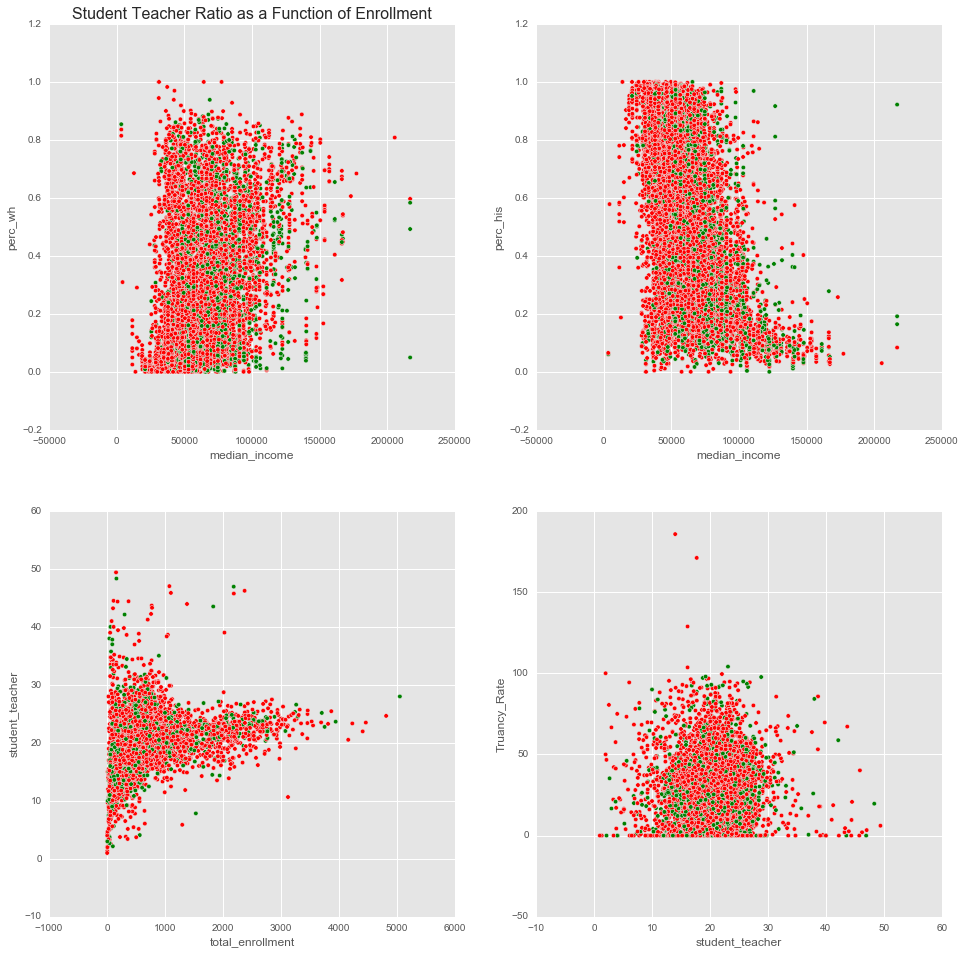

In [120]:
color = df.above_50pp.map(pd.Series({True: 'green', False: 'red'}))

figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 16))

df.plot('median_income','perc_wh', kind = 'scatter',c=color, ax = axes[0, 0])
axes[0, 0].set_title('Percent White as a Function of Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df.plot('median_income','perc_his', kind = 'scatter',c=color, ax = axes[0, 1])
axes[0, 0].set_title('Percent Hispanic as a Function of Income', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df[df.student_teacher<50].plot('student_teacher','Truancy_Rate', kind = 'scatter',c=color, ax = axes[1, 1])
axes[0, 0].set_title('Truancy Rate as a Function of Student Teacher Ratio', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


df[df.student_teacher<50].plot('total_enrollment','student_teacher', kind = 'scatter',c=color, ax = axes[1, 0])
axes[0, 0].set_title('Student Teacher Ratio as a Function of Enrollment', fontsize = 16)
#axes[0, 0].set_xlabel('')
#axes[0, 0].set_xlim(0)
#axes[0, 0].set_ylabel('')
#axes[0, 0].set_ylim(0)


In [121]:
df.count()

CDSCode                  9046
County                   9046
District                 9046
School                   9046
Latitude                 9046
Longitude                9046
FundingType              1095
five_zip                 9046
type                     9046
charter                  1062
met_all                  9046
crit1                    9046
crit2                    9046
e_enr                    8908
e_tst                    8908
e_prof                   8908
m_enr                    8908
m_tst                    8908
m_prof                   8908
ee_aa                    8908
et_aa                    8908
enp_aa                   9046
me_aa                    8908
mt_aa                    8908
mnp_aa                   9046
ee_wh                    8908
et_wh                    8908
enp_wh                   9046
me_wh                    8908
mt_wh                    8908
                         ... 
num_staff                7305
num_staff_masters        7305
avg_years_